In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gpytorch.priors import GammaPrior
from edbo.bro import BO

%matplotlib inline

In [20]:
from data_loader import suzuki, casp15

test_casp15 = casp15()

#test_suzuki = suzuki(electrophile='dft',                 # dft, mordred, or ohe
#                     nucleophile='dft',                  # dft, mordred, or ohe
#                     base='dft',                         # dft, mordred, or ohe
#                     ligand='boltzmann-dft',             # random-dft, boltzmann-dft, mordred, or ohe
#                     solvent='dft')                      # dft, mordred, or ohe

#print("Suzuki Returns: ")
#print(test_suzuki)

print("Casp15 Returns: ")
print(test_casp15)


Casp15 Returns: 
      AL0_P  TM-score  TM-align  AL4_P    QCS  Z-score  Handed.     SS   DFM  \
0     77.78     0.794     0.797  88.89  87.09     7.43     0.91  0.463  0.17   
1     36.47     0.410     0.444  41.76  53.52     2.81     0.91  0.520  0.37   
2     72.17     0.888     0.893  87.39  97.86    12.90     0.94  0.650  0.09   
3     95.50     0.921     0.924  98.20  97.10     8.25     0.95  0.678  0.04   
4     57.27     0.571     0.569  64.55  67.85     3.86     0.92  0.462  0.22   
...     ...       ...       ...    ...    ...      ...      ...    ...   ...   
3999  95.50     0.929     0.932  98.20  97.33     8.25     0.95  0.694  0.04   
4000  95.93     0.972     0.972  96.83  99.00    10.91     0.97  0.780  0.05   
4001  95.50     0.943     0.946  98.20  97.77     8.25     0.96  0.698  0.04   
4002   0.00     0.388     0.405   0.00  26.25     0.84     0.80  0.204  0.32   
4003  88.33     0.733     0.733  98.33  79.79     5.93     0.90  0.429  0.06   

      GDT_TS  
0      

### Data Preprocessing

In [27]:
from edbo.utils import Data
from data_loader import suzuki, casp15

casp15 = Data(casp15()) # load casp data

#casp.drop(['F1', 'F2']) # drop unwanted columns 

print(casp15.data)

# Standardize (normalize, etc)
casp15.standardize(target='GDT_TS', scaler='minmax')

# Drop highly correlated features
#casp15.uncorrelated(target='GDT_TS', threshold=0.95)

print(casp.data)

      AL0_P  TM-score  TM-align  AL4_P    QCS  Z-score  Handed.     SS   DFM  \
0     77.78     0.794     0.797  88.89  87.09     7.43     0.91  0.463  0.17   
1     36.47     0.410     0.444  41.76  53.52     2.81     0.91  0.520  0.37   
2     72.17     0.888     0.893  87.39  97.86    12.90     0.94  0.650  0.09   
3     95.50     0.921     0.924  98.20  97.10     8.25     0.95  0.678  0.04   
4     57.27     0.571     0.569  64.55  67.85     3.86     0.92  0.462  0.22   
...     ...       ...       ...    ...    ...      ...      ...    ...   ...   
3999  95.50     0.929     0.932  98.20  97.33     8.25     0.95  0.694  0.04   
4000  95.93     0.972     0.972  96.83  99.00    10.91     0.97  0.780  0.05   
4001  95.50     0.943     0.946  98.20  97.77     8.25     0.96  0.698  0.04   
4002   0.00     0.388     0.405   0.00  26.25     0.84     0.80  0.204  0.32   
4003  88.33     0.733     0.733  98.33  79.79     5.93     0.90  0.429  0.06   

      GDT_TS  
0      76.92  
1      38

### Bayesian Optimization

C:\Users\lucap\Desktop\Uni\Postgrad\1st Term (Michaelmas)\L48 Machine Learning and The Physical World\Project\l48-project\code\edbo\acq_func.py:263: RuntimeWarning: invalid value encountered in sqrt
  x = 4
C:\Users\lucap\Desktop\Uni\Postgrad\1st Term (Michaelmas)\L48 Machine Learning and The Physical World\Project\l48-project\code\edbo\acq_func.py:263: RuntimeWarning: invalid value encountered in sqrt
  x = 4
C:\Users\lucap\Desktop\Uni\Postgrad\1st Term (Michaelmas)\L48 Machine Learning and The Physical World\Project\l48-project\code\edbo\acq_func.py:263: RuntimeWarning: invalid value encountered in sqrt
  x = 4
C:\Users\lucap\Desktop\Uni\Postgrad\1st Term (Michaelmas)\L48 Machine Learning and The Physical World\Project\l48-project\code\edbo\acq_func.py:263: RuntimeWarning: invalid value encountered in sqrt
  x = 4
C:\Users\lucap\Desktop\Uni\Postgrad\1st Term (Michaelmas)\L48 Machine Learning and The Physical World\Project\l48-project\code\edbo\acq_func.py:263: RuntimeWarning: invalid

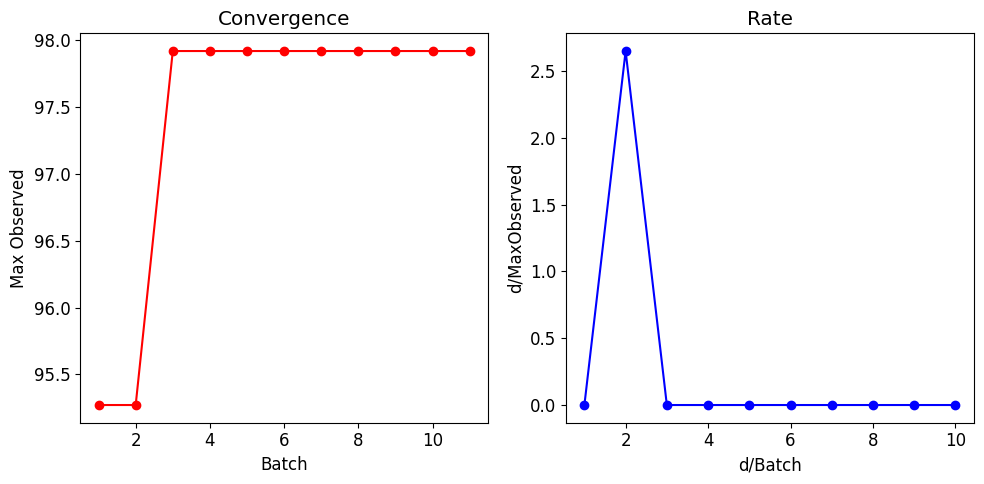

In [31]:
from edbo.bro import BO

# TODO: play around with the surrogate model and use to instantiate BO

# Instantiate edbo.bro.BO
bo = BO(exindex=casp15.data,                      # Experiment index to look up results from
        domain=casp15.data.drop('GDT_TS', axis=1),  # Reaction space
        batch_size=12,                          # Choose 20 experiments on each iteraiton 
        acquisition_function='EI',              # Use expected improvement
        fast_comp=True)                         # Speed up the simulations using gpytorch's fast computation features

# Run simulation
bo.simulate(iterations=9, seed=0)

# Plot convergence
bo.plot_convergence()

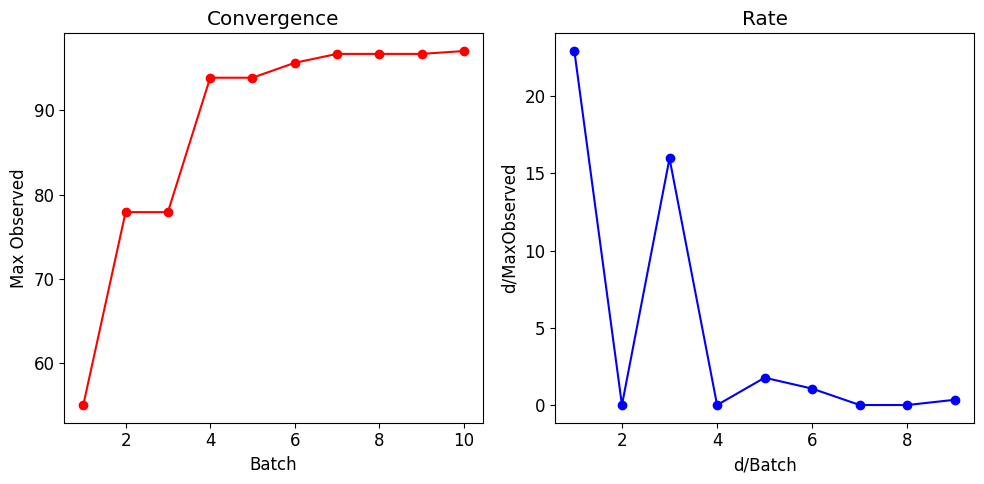

In [32]:
from edbo.bro import BO

# TODO: play around with the surrogate model and use to instantiate BO

# Instantiate edbo.bro.BO
bo = BO(exindex=casp15.data,                      # Experiment index to look up results from
        domain=casp15.data.drop('GDT_TS', axis=1),  # Reaction space
        batch_size=1,                          # Choose 20 experiments on each iteraiton 
        acquisition_function='TS',              # Use expected improvement
        fast_comp=True)                        # Speed up the simulations using gpytorch's fast computation features

# Run simulation
bo.simulate(iterations=9, seed=0)

# Plot convergence
bo.plot_convergence()

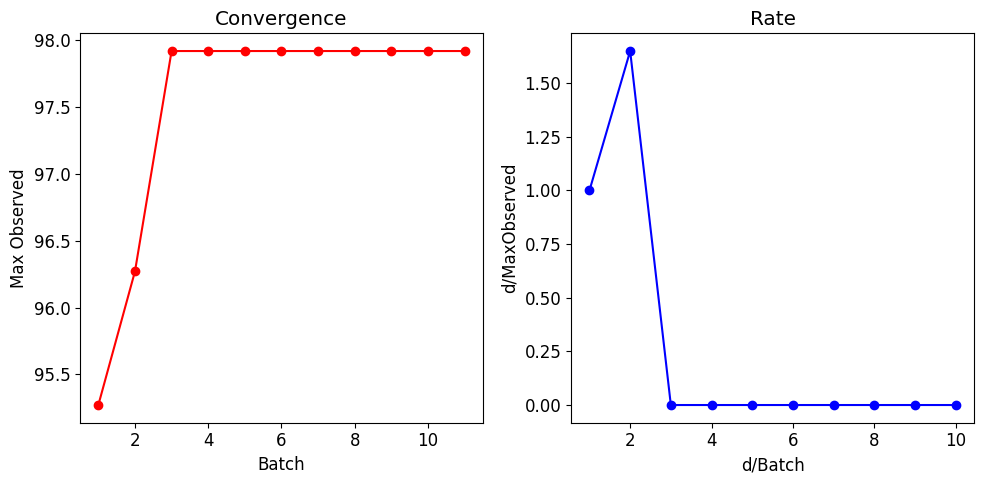

In [33]:
from edbo.bro import BO

# TODO: play around with the surrogate model and use to instantiate BO

# Instantiate edbo.bro.BO
bo = BO(exindex=casp15.data,                      # Experiment index to look up results from
        domain=casp15.data.drop('GDT_TS', axis=1),  # Reaction space
        batch_size=20,                          # Choose 20 experiments on each iteraiton 
        acquisition_function='TS',              # Use expected improvement
        fast_comp=True)                         # Speed up the simulations using gpytorch's fast computation features

# Run simulation
bo.simulate(iterations=9, seed=0)

# Plot convergence
bo.plot_convergence()

### Simulations

In [34]:
from edbo.models import GP_Model, RF_Model, Random
from edbo.plot_utils import average_convergence, plot_avg_convergence
import pandas as pd

# Function for simulating different BO parameters

def simulate(data,                 # Data container (vide supra)
             acq_func,             # Acquisition function: 'EI', 'PI', 'UCB', 'TS', ...
             model=GP_Model,       # Surrogate model: GP_Model or RF_Model
             init_method='rand',   # Initialization method: 'rand', 'pam', 'kmeans'
             batch_size=1,        # Parallel acquisition: int
             iterations=9,         # Number of iterations to run each simulation for
             average_of=10,        # Number of simulations to average
             export_path=None,     # Export the simulation results to a CSV file
             plot=False):          # Plot the average and standard deviation averaged convergence
    """
    Simulation function which averages BO runs with given optimization paramters.
    """
    
    # Average N optimizations with different random initializations
    results = []
    for i in range(average_of):
        
        print(f"Experiment {i+1}/{average_of}...")
        
        # Use random function if the acquisition function is random selection
        if acq_func == 'rand':
            bo = BO(exindex=data.data,
                    domain=data.data.drop('GDT_TS', axis=1),
                    init_method=init_method,
                    model=Random,
                    batch_size=batch_size,
                    acquisition_function=acq_func)
        # Otherwise use specified model
        else:
            bo = BO(exindex=data.data,
                    domain=data.data.drop('GDT_TS', axis=1),
                    model=model,
                    init_method=init_method,
                    batch_size=batch_size,
                    acquisition_function=acq_func,
                    fast_comp=True)                            # Use gpytorch fast computation features
            
        # Simulate
        bo.init_seq.visualize = False
        bo.simulate(iterations=iterations, seed=i)
        
        # Append results to record
        results.append(bo.obj.results_input()['GDT_TS'].values)
        
    # Save the results to a CSV file
    results = pd.DataFrame(results)
    if export_path != None:
        results.to_csv(export_path)
        
    # Average performance
    index, mean, std = average_convergence(results, batch_size)
    
    # Plot
    if plot:
        plot_avg_convergence(results, batch_size)
        
    return results, mean, std

Acquisition Function: TS
Experiment 1/15...
Experiment 2/15...
Experiment 3/15...
Experiment 4/15...
Experiment 5/15...
Experiment 6/15...
Experiment 7/15...
Experiment 8/15...
Experiment 9/15...
Experiment 10/15...
Experiment 11/15...
Experiment 12/15...
Experiment 13/15...
Experiment 14/15...
Experiment 15/15...


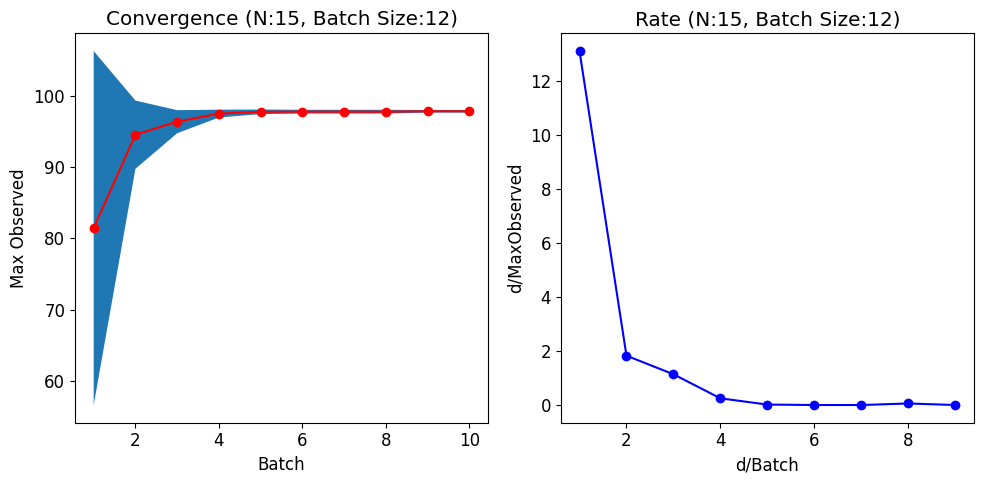

Acquisition Function: rand
Experiment 1/15...
Experiment 2/15...
Experiment 3/15...
Experiment 4/15...
Experiment 5/15...
Experiment 6/15...
Experiment 7/15...
Experiment 8/15...
Experiment 9/15...
Experiment 10/15...
Experiment 11/15...
Experiment 12/15...
Experiment 13/15...
Experiment 14/15...
Experiment 15/15...


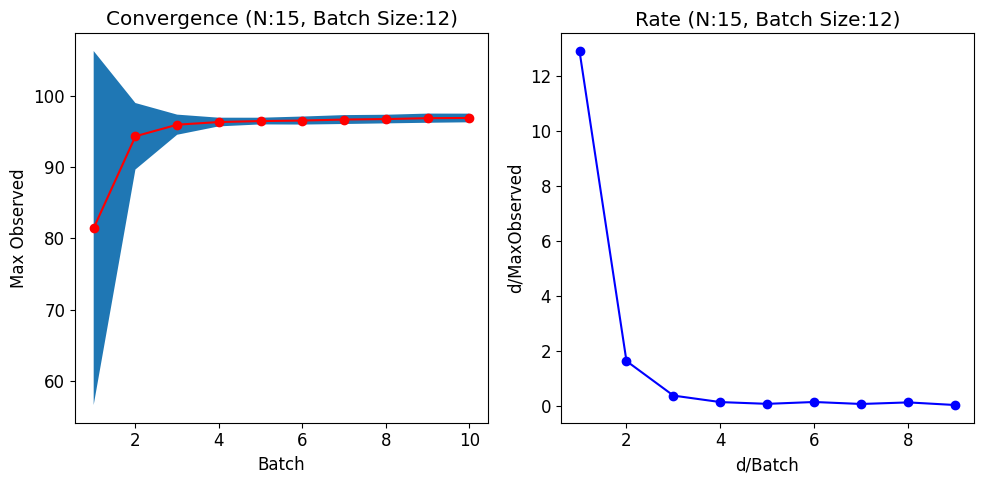

Acquisition Function: eps-greedy
Experiment 1/15...
Experiment 2/15...
Experiment 3/15...
Experiment 4/15...
Experiment 5/15...
Experiment 6/15...
Experiment 7/15...
Experiment 8/15...
Experiment 9/15...
Experiment 10/15...
Experiment 11/15...
Experiment 12/15...
Experiment 13/15...
Experiment 14/15...
Experiment 15/15...


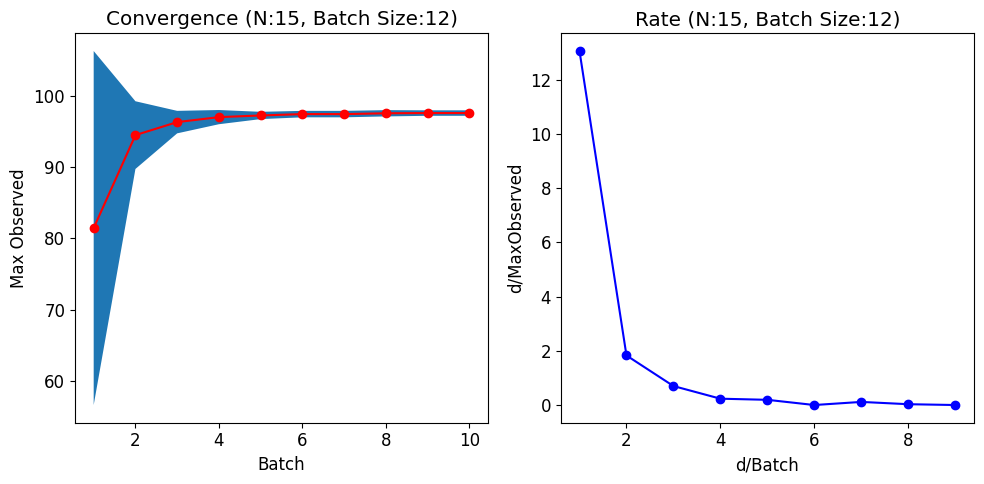

Acquisition Function: MeanMax
Experiment 1/15...
Experiment 2/15...
Experiment 3/15...


C:\Users\lucap\anaconda3\envs\edbo\lib\site-packages\gpytorch\utils\cholesky.py:43: RuntimeWarning: A not p.d., added jitter of 9.999999999999999e-06 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new} to the diagonal", RuntimeWarning)
C:\Users\lucap\anaconda3\envs\edbo\lib\site-packages\gpytorch\utils\cholesky.py:43: RuntimeWarning: A not p.d., added jitter of 9.999999999999999e-05 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new} to the diagonal", RuntimeWarning)
C:\Users\lucap\anaconda3\envs\edbo\lib\site-packages\gpytorch\utils\cholesky.py:43: RuntimeWarning: A not p.d., added jitter of 9.999999999999999e-06 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new} to the diagonal", RuntimeWarning)
C:\Users\lucap\anaconda3\envs\edbo\lib\site-packages\gpytorch\utils\cholesky.py:43: RuntimeWarning: A not p.d., added jitter of 9.999999999999999e-05 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new

Experiment 4/15...
Experiment 5/15...
Experiment 6/15...


C:\Users\lucap\anaconda3\envs\edbo\lib\site-packages\gpytorch\utils\cholesky.py:43: RuntimeWarning: A not p.d., added jitter of 9.999999999999999e-06 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new} to the diagonal", RuntimeWarning)
C:\Users\lucap\anaconda3\envs\edbo\lib\site-packages\gpytorch\utils\cholesky.py:43: RuntimeWarning: A not p.d., added jitter of 9.999999999999999e-05 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new} to the diagonal", RuntimeWarning)
C:\Users\lucap\anaconda3\envs\edbo\lib\site-packages\gpytorch\utils\cholesky.py:43: RuntimeWarning: A not p.d., added jitter of 1e-06 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new} to the diagonal", RuntimeWarning)
C:\Users\lucap\anaconda3\envs\edbo\lib\site-packages\gpytorch\utils\cholesky.py:43: RuntimeWarning: A not p.d., added jitter of 9.999999999999999e-06 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new} to the diagona

Experiment 7/15...


C:\Users\lucap\anaconda3\envs\edbo\lib\site-packages\gpytorch\utils\cholesky.py:43: RuntimeWarning: A not p.d., added jitter of 9.999999999999999e-06 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new} to the diagonal", RuntimeWarning)
C:\Users\lucap\anaconda3\envs\edbo\lib\site-packages\gpytorch\utils\cholesky.py:43: RuntimeWarning: A not p.d., added jitter of 1e-06 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new} to the diagonal", RuntimeWarning)
C:\Users\lucap\anaconda3\envs\edbo\lib\site-packages\gpytorch\utils\cholesky.py:43: RuntimeWarning: A not p.d., added jitter of 9.999999999999999e-06 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new} to the diagonal", RuntimeWarning)
C:\Users\lucap\anaconda3\envs\edbo\lib\site-packages\gpytorch\utils\cholesky.py:43: RuntimeWarning: A not p.d., added jitter of 9.999999999999999e-05 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new} to the diagona

Experiment 8/15...
Experiment 9/15...
Experiment 10/15...
Experiment 11/15...
Experiment 12/15...


C:\Users\lucap\anaconda3\envs\edbo\lib\site-packages\gpytorch\utils\cholesky.py:43: RuntimeWarning: A not p.d., added jitter of 9.999999999999999e-06 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new} to the diagonal", RuntimeWarning)


Experiment 13/15...
Experiment 14/15...
Experiment 15/15...


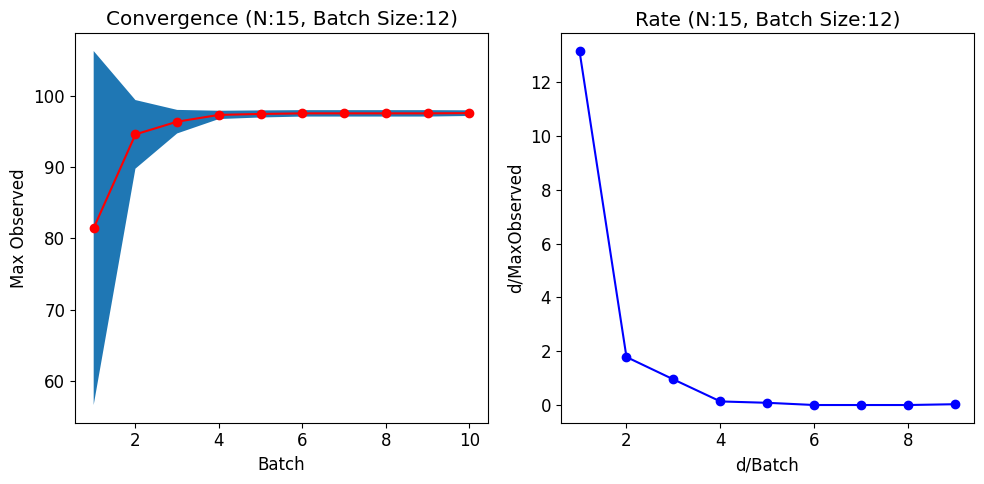

Acquisition Function: VarMax
Experiment 1/15...
Experiment 2/15...
Experiment 3/15...
Experiment 4/15...
Experiment 5/15...
Experiment 6/15...
Experiment 7/15...
Experiment 8/15...
Experiment 9/15...
Experiment 10/15...
Experiment 11/15...
Experiment 12/15...
Experiment 13/15...
Experiment 14/15...
Experiment 15/15...


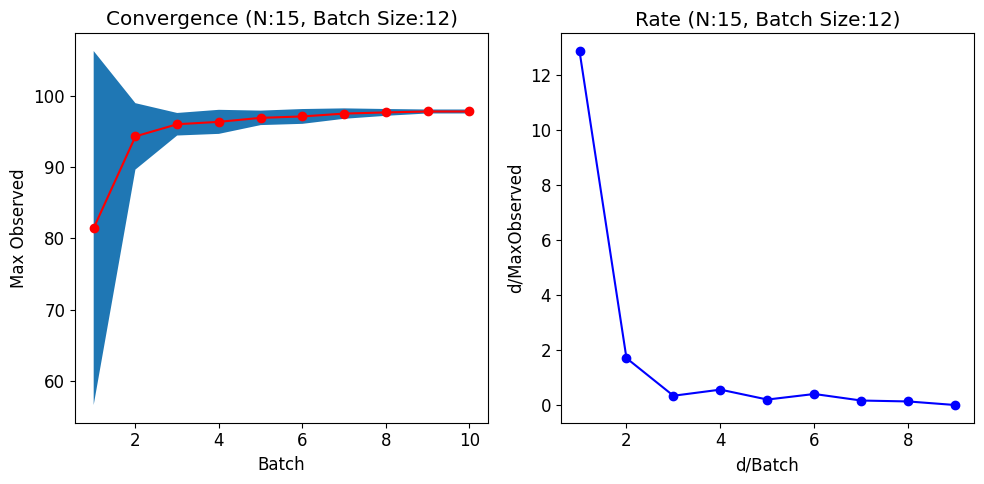

Average performance for all acquisition functions:


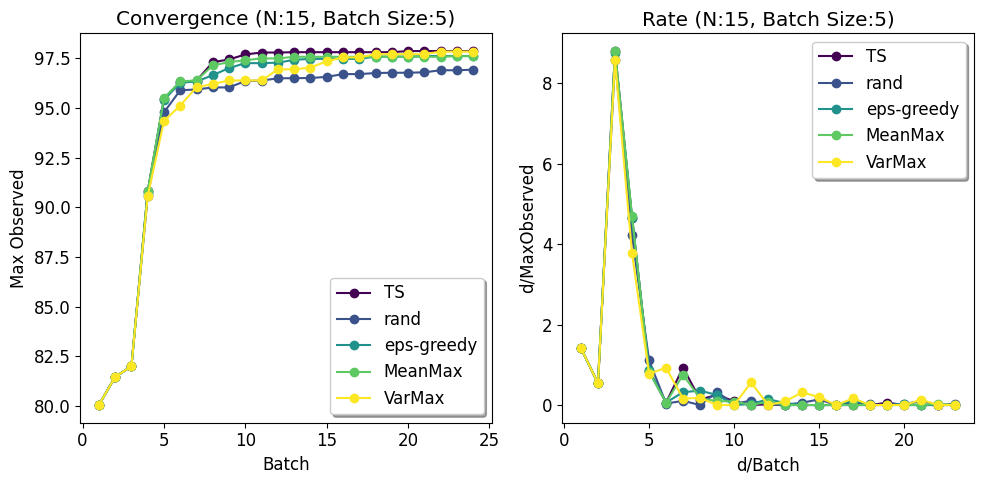

In [36]:
from edbo.plot_utils import compare_convergence

# Simulation

acq_funcs = ['TS', 'rand', 'eps-greedy', 'MeanMax', 'VarMax']
acq_func_results = []

for acq_func in acq_funcs:
    # Run simulations
    print('Acquisition Function:', acq_func)
    results, mean, std = simulate(casp15,          # Data from reaction 
                              acq_func,            # Iterate over acq. funcs.
                              model=GP_Model,      # Gaussian process model
                              init_method='rand',  # Random initialization
                              batch_size=12,        # Choose 5 experiments at a time
                              iterations=9,        # Run for 9 iterations
                              average_of=15,       # Run with 15 different random seeds
                              export_path=None,    # Don't save the results
                              plot=True)           # Plot the average results
    # Save results
    acq_func_results.append(results)

# Compare average convergence for each acquisition function
print('Average performance for all acquisition functions:')
compare_convergence(acq_func_results, 5, acq_funcs)

#### Ideas

- Visualise the surrogate model space (posterior) after certain numbers of iterations to show exploration/exploitation
- Visualise the separation of the data in space for a few features